### Exercise 1
Suppose the people who own page 3 in the web of Figure 1 are infuriated by the
fact that its importance score, computed using formula (2.1), is lower than the score of page 1. In
an attempt to boost page 3’s score, they create a page 5 that links to page 3; page 3 also links to page
5. Does this boost page 3’s score above that of page 1?

![image](./img/image.png)

In [13]:
import numpy as np

A = np.array([[0, 0, 1, 1/2],
         [1/3, 0, 0, 0],
         [1/3, 1/2, 0, 1/2],
         [1/3, 1/2, 0, 0]])

A_mod = np.array([[0, 0, 1/2, 1/2, 0],
         [1/3, 0, 0, 0, 0],
         [1/3, 1/2, 0, 1/2, 1],
         [1/3, 1/2, 0, 0, 0],
         [0, 0, 1/2, 0, 0]])

#print(A)
print(np.array2string(A, formatter={'float_kind':lambda x: "%.3f" % x}))
#print(A_mod)
print(np.array2string(A_mod, formatter={'float_kind':lambda x: "%.3f" % x}))

[[0.000 0.000 1.000 0.500]
 [0.333 0.000 0.000 0.000]
 [0.333 0.500 0.000 0.500]
 [0.333 0.500 0.000 0.000]]
[[0.000 0.000 0.500 0.500 0.000]
 [0.333 0.000 0.000 0.000 0.000]
 [0.333 0.500 0.000 0.500 1.000]
 [0.333 0.500 0.000 0.000 0.000]
 [0.000 0.000 0.500 0.000 0.000]]


In [14]:
#Stockastic check
def isSto(A): 
    col_sums = A_mod.sum(axis=0)
    return (col_sums == 1).all()

if isSto(A):
    print("A is stochastic")
if isSto(A_mod):
    print("A_mod is stochastic")


A is stochastic
A_mod is stochastic


In [15]:

def print_eig(label, eigvals, eigvecs):
    print(f"\n=== Eigen Decomposition for {label} ===")
    for i, (val, vec) in enumerate(zip(eigvals, eigvecs.T), 1):
        print(f"Eigenvalue {i}: {val:.6f}")
        print(f"Eigenvector {i}: {vec}")
        print("-" * 40)


eigvals_A, eigvecs_A = np.linalg.eig(A)
eigvals_Am, eigvecs_Am = np.linalg.eig(A_mod)

#print_eig("A", eigvals_A, eigvecs_A)
#print_eig("A_mod", eigvals_Am, eigvecs_Am)

# Function
def standardizer(x, round=3):
    sum = x.sum()
    x = x/sum
    return np.round(x, round)


index = np.where(np.isclose(eigvals_A, 1.0, atol=1e-8)) # we cannot use np.where because of rounding errors
print(np.real(standardizer(eigvecs_A.T[index])))
index = np.where(np.isclose(eigvals_Am, 1.0, atol=1e-8))
print(np.real(standardizer(eigvecs_Am.T[index])))

[[0.387 0.129 0.29  0.194]]
[[0.245 0.082 0.367 0.122 0.184]]


In [16]:

def my_gauss(M, tol=1e-8):
    """
    Function that compute the row echelon form of a given matrix M.
    :param M: 2D-array object (numpy ndarray)
    :param tol: tolerance for setting to zero the numerical zeros for computing Around
    :return A: 2D-array object (numpy ndarray) representing the row echelon form of M
    :return Around: The matrix A where values under the tolerance are set to zeros (to obtain a "real" row echelon form)
    :return rank: return the rank of M (computed exploiting the row echelon form A)
    """

    A = M.copy()
    m, n = A.shape

    k = 0  # pivot index
    j = 0  # column index
    
    # ATTENTION!: remember the 0-indexing convention of Python!
    while k < m and j < n:
        # rows corresponding to max abs in columns
        row_maxabsel = k + np.abs(A[k:, j]).argmax(axis=0)
        
        # max abs values in column
        maxabsel = A[row_maxabsel, j]

        # Swap "maximum-abs-row" (row_maxabsel) with row k and
        # perform operations to put as 0 all the entries below entry of position (k,j)
        if ... :  # <-- TODO! (insert the check on maxabsel not zero... using the tolerance!)
            # Swapping
            kth_row = A[k, :].copy()
            ... # <-- TODO!
            # write above one or more lines of code to complete the swap between rows.
            
            # Zeros: DO NOT USE A for!!!
            factor_vec = np.array(A[(k + 1):, j] / maxabsel, ndmin=2).T
            ... # <-- TODO!
            # complete the line above to build a column vector with the coefficients a_ij/maxabsel 
            # necessary to set to zero the elements under the pivot.
            
            k += 1

        j += 1

    Around = A.copy()
    # For aesthetic reasons only:
    Around[np.abs(A) < tol] = 0
    
    # RANK COMPUTATION
    smallest_axis = np.argmin(Around.shape)  # case m == n --> returns 0 ('rows')
    nonzero_axis = Around.nonzero()[smallest_axis]
    rank = np.unique(nonzero_axis).size

    return A, Around, rank

In [17]:
my_gauss(A)

/var/folders/j9/m1q0h7955ls67lg17_lw___80000gn/T/ipykernel_27542/1401955892.py:34: RuntimeWarning:

invalid value encountered in divide



(array([[0.        , 0.        , 1.        , 0.5       ],
        [0.33333333, 0.        , 0.        , 0.        ],
        [0.33333333, 0.5       , 0.        , 0.5       ],
        [0.33333333, 0.5       , 0.        , 0.        ]]),
 array([[0.        , 0.        , 1.        , 0.5       ],
        [0.33333333, 0.        , 0.        , 0.        ],
        [0.33333333, 0.5       , 0.        , 0.5       ],
        [0.33333333, 0.5       , 0.        , 0.        ]]),
 4)

In [18]:
from functions.graph import Node
# Create two nodes
node1 = Node(number=1)
node2 = Node(number=2)

node1.addOut([node2.number]) 
node2.addIn([node1.number])

# Check the counts
print(f"Node 1: {node1}")
print(f"Node 1 Outgoing Count: {node1.getOutCount()}") # Output: 1
print(f"Node 1 Incoming Count: {node1.getInCount()}") # Output: 0

print(f"\nNode 2: {node2}")
print(f"Node 2 Outgoing Count: {node2.getOutCount()}") # Output: 0
print(f"Node 2 Incoming Count: {node2.getInCount()}") # Output: 1

Node 1: Node(number=1, out=[2.], in=[])
Node 1 Outgoing Count: 1
Node 1 Incoming Count: 0

Node 2: Node(number=2, out=[], in=[1.])
Node 2 Outgoing Count: 0
Node 2 Incoming Count: 1



Plotting graph... (A new window should open)


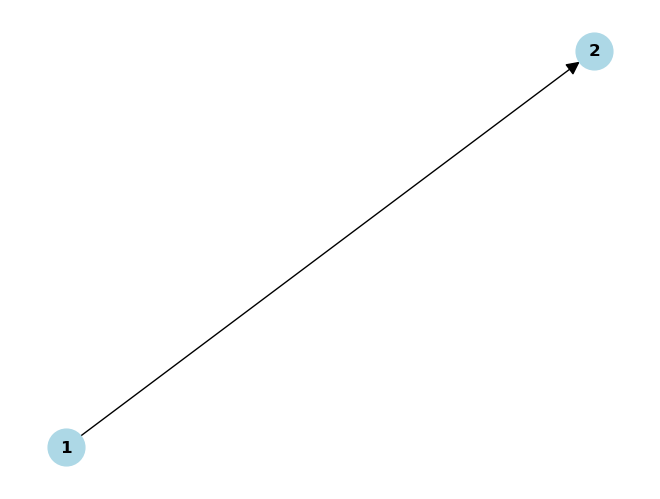

In [19]:
#code for testing node adding
from functions.graph import Graph
from functions.graph import Node


node1 = Node(number=1)
node2 = Node(number=2)

node1.addOut([node2.number]) 
node2.addIn([node1.number])

graph = Graph([node1, node2])
graph.getNode(2)
graph.plot()

In [20]:
f = open("/Users/luciobaiocchi/polito/0_Algebra/PageRank/hollins.dat")
first_line = f.readline().split(" ")
url_count = int(first_line[0])
arch_count = int(first_line[1])

#print(url_count, arch_count)

content = f.readlines()
urls = content[0:url_count]
connections = content[url_count:]

del(content, first_line)

In [21]:
import pandas as pd
import numpy as np

# source-> links to -> dest
# IN our case :
# dest: source
# 1     2
# 8     2
# 16    2
# 18    2
# 20    2
# 23    2
# 26    2
# 27    2
# 28    2
# 29    2
source = np.array([])
dest = np.array([])
for connection in connections:
    line = connection.split(" ")
    source = np.append(source, int(line[0]))
    dest = np.append(dest, int(line[1]))

data = {
  "source": source,
  "destination": dest
}
df = pd.DataFrame(data)

In [22]:
# Group by 'destination' and aggregate 'source' values into a list (or numpy array)

df_out = df.groupby('destination')['source'].apply(lambda x: x.to_numpy())
#print(source_by_dest)
# To access a specific array: source_by_dest[4.0]

# Group by 'source' and aggregate 'destination' values into a list (or numpy array)
df_in = df.groupby('source')['destination'].apply(lambda x: x.to_numpy())
#print(dest_by_source)

In [25]:
'''
data_out = [[2, 3, 4], [3, 4], [1], [1, 3]]

df_out = pd.Series(data_out) # Usato per archi in USCITA

data_in = [[3, 4], [1], [4, 2, 1], [2, 1]]
df_in = pd.Series(data_in) # Usato per archi in ENTRATA
'''
# --- 3. Graph Construction Logic (Corrected) ---

graph = Graph()


for node_id in df_out.index:    
    node = Node(number=node_id)
    out_connections = df_out.loc[int(node_id)]
    node.addOut(out_connections)
    graph.addNode(node)


for node_id in df_in.index:
    node = graph.getNode(node_id)
    
    if node:
        in_connections = df_in.loc[int(node_id)]
        node.addIn(in_connections)
    else:
        node = Node(number=node_id)
        node.addOut(out_connections)
        graph.addNode(node)

#print(graph.getNode(2))  
#graph.plotLargePlotly()

In [24]:
node = graph.getNode(2)